### Edgar Moises Hernandez-Gonzalez
#### 19/11/19
#### Clasificar RAW con Conv-LSTM-2D

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#convertir de 2D a 5D
x_train = x_train.reshape((n_samples_train, 1, 1, 3, 22))
x_test = x_test.reshape((n_samples_test, 1, 1, 3, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 3, 22)
(288, 1, 1, 3, 22)


In [16]:
model = Sequential()
model.add(ConvLSTM2D(128, (1,3), activation='relu', input_shape=(1,1,3,22)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 1, 128)         230912    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 239,428
Trainable params: 239,428
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 2s 8ms/sample - loss: 1.3814 - acc: 0.2708 - val_loss: 1.4030 - val_acc: 0.2917
Epoch 2/20
288/288 [==============================] - 0s 737us/sample - loss: 1.3491 - acc: 0.3507 - val_loss: 1.4070 - val_acc: 0.3090
Epoch 3/20
288/288 [==============================] - 0s 701us/sample - loss: 1.3312 - acc: 0.3160 - val_loss: 1.3898 - val_acc: 0.3542
Epoch 4/20
288/288 [==============================] - 0s 805us/sample - loss: 1.3387 - acc: 0.3611 - val_loss: 1.4471 - val_acc: 0.3403
Epoch 5/20
288/288 [==============================] - 0s 742us/sample - loss: 1.2928 - acc: 0.4132 - val_loss: 1.3857 - val_acc: 0.3472
Epoch 6/20
288/288 [==============================] - 0s 779us/sample - loss: 1.2974 - acc: 0.4028 - val_loss: 1.2943 - val_acc: 0.3889
Epoch 7/20
288/288 [==============================] - 0s 790us/sample - loss: 1.2511 - acc: 0.4306 - val_loss: 1.3724 - val_acc: 0.3889
Epoc

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 177us/sample - loss: 1.2537 - acc: 0.4549
Test loss: 1.2537273632155523
Test accuracy: 0.4548611


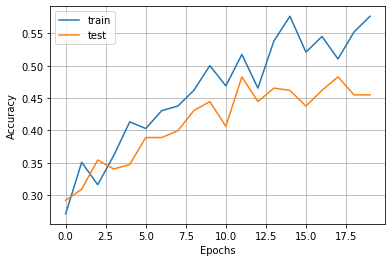

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

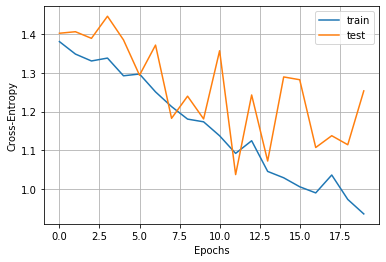

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [23]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [24]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.27314814814814814


In [25]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[33 28  3  8]
 [20 44  6  2]
 [25  1 22 24]
 [25  1 14 32]]


In [26]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.32      0.46      0.38        72
           1       0.59      0.61      0.60        72
           2       0.49      0.31      0.38        72
           3       0.48      0.44      0.46        72

   micro avg       0.45      0.45      0.45       288
   macro avg       0.47      0.45      0.45       288
weighted avg       0.47      0.45      0.45       288

